# DSCI 591: Data Science Capstone I <br> EDA on CMS Global Fire Atlas Dataset: Duration

## Relevant Libraries

In [1]:
!pip3 install gdal

In [2]:
!pip3 install imageio

In [3]:
#Importing data
from osgeo import gdal

#General Data Analysis
import numpy as np
#Principle Component Analysis
from sklearn.decomposition import PCA
# Clustering Analysis
from sklearn.cluster import KMeans
# Hypothesis Testing
from scipy.stats import pearsonr

#Plotting / Visualization Needs
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## Importing the Data

In [4]:
#Establish file paths for each year in the yearly data .tif files

base_path = 'C:\\Users\\ConnorRoth\\Documents\\Grad School\\Spring 2023\\DSCI 591\\Datasets\\Global Fire Atlas\\CMS_Global_Fire_Atlas_1642\\data'

tif_file2003 = base_path + '\\Global_fire_atlas_duration_monthly_2003.tif'
tif_file2004 = base_path + '\\Global_fire_atlas_duration_monthly_2004.tif'
tif_file2005 = base_path + '\\Global_fire_atlas_duration_monthly_2005.tif'
tif_file2006 = base_path + '\\Global_fire_atlas_duration_monthly_2006.tif'
tif_file2007 = base_path + '\\Global_fire_atlas_duration_monthly_2007.tif'
tif_file2008 = base_path + '\\Global_fire_atlas_duration_monthly_2008.tif'
tif_file2009 = base_path + '\\Global_fire_atlas_duration_monthly_2009.tif'
tif_file2010 = base_path + '\\Global_fire_atlas_duration_monthly_2010.tif'
tif_file2011 = base_path + '\\Global_fire_atlas_duration_monthly_2011.tif'
tif_file2012 = base_path + '\\Global_fire_atlas_duration_monthly_2012.tif'
tif_file2013 = base_path + '\\Global_fire_atlas_duration_monthly_2013.tif'
tif_file2014 = base_path + '\\Global_fire_atlas_duration_monthly_2014.tif'
tif_file2015 = base_path + '\\Global_fire_atlas_duration_monthly_2015.tif'
tif_file2016 = base_path + '\\Global_fire_atlas_duration_monthly_2016.tif'
 
tif = [tif_file2003, tif_file2004, tif_file2005, tif_file2006, tif_file2007, tif_file2008, tif_file2009, tif_file2010, tif_file2011, tif_file2012, tif_file2013, tif_file2014, tif_file2015, tif_file2016]

In [5]:
#Examine whole of dataset
data = []
for tif_file in tif:
    ds = gdal.Open(tif_file)
    data.append(ds.ReadAsArray())
data = np.array(data)

In [6]:
#Examine 2003 in particular
ds_2003 = gdal.Open(tif_file2003)
if ds_2003 is None:
    print('Failed to open the TIFF file.')
else:
    data_2003 = ds_2003.ReadAsArray()
    print('Raster dimensions:', data_2003.shape)
    print('Data type:', data_2003.dtype)

Raster dimensions: (12, 720, 1440)
Data type: float32


## EDA on Single Year (2003)

In [7]:
# Create bands from TIFF file
bands_2003 = ds_2003.RasterCount
print(bands_2003)

#Gather metadata from the 
metadata_2003 = ds_2003.GetMetadata()
print(metadata_2003)

12
{'AREA_OR_POINT': 'Area'}


In [8]:
print("Minimum value:", np.min(data_2003))
print("Maximum value:", np.max(data_2003))
print("Mean value:", np.mean(data_2003))
print("Standard deviation:", np.std(data_2003))

Minimum value: -9999.0
Maximum value: 70.0
Mean value: -9861.498
Standard deviation: 1164.7769


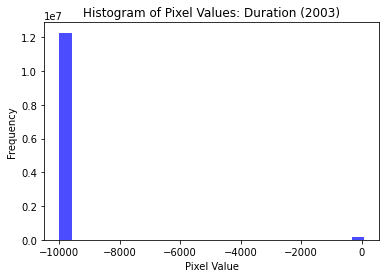

In [9]:
plt.hist(data_2003.flatten(), bins='auto', color='b', alpha=0.7)
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.title("Histogram of Pixel Values: Duration (2003)")
plt.show()

In [10]:
print(data_2003.shape)

(12, 720, 1440)


### Examine 2003 Monthly Heatmap

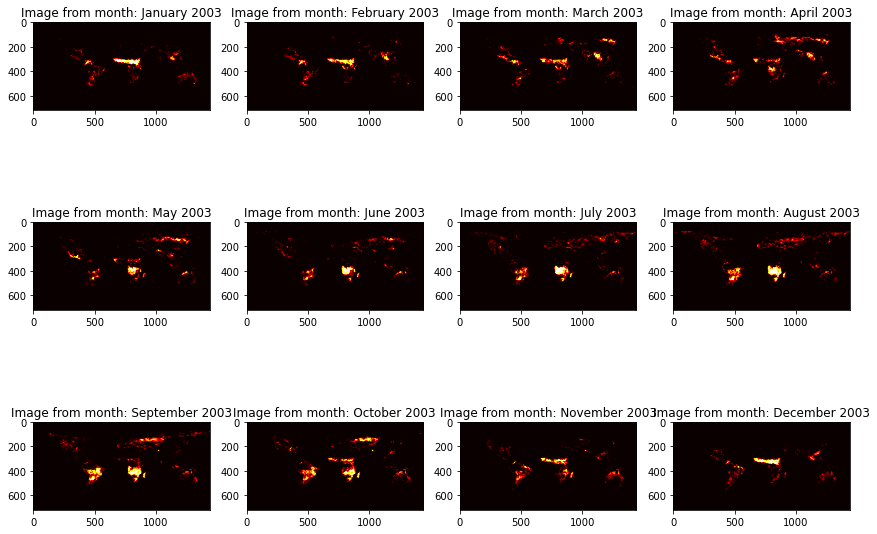

In [11]:
# Create subplots for each image
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9))

# Iterate over the images and plot them
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, ax in enumerate(axes.flatten()):
    ax.imshow(data_2003[i], cmap='hot')
    ax.set_title(f"Image from month: " + months[i] + " 2003")

plt.tight_layout()
# Show the plot
plt.show()

### Generate 2003 Animation of Monthly Duration

Animation saved as animation_duration_2003.gif


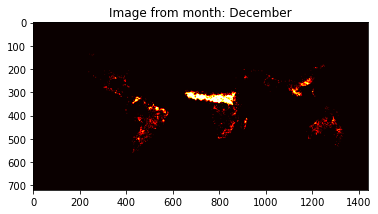

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
image = axes.imshow(data_2003[0], cmap='hot')
axes.set_title("Image from month: " + months[0])

# Update function for animation
def update(frame):
    image.set_array(data_2003[frame])
    axes.set_title("Image from month: " + months[frame])
    return image,

# Create the animation
ani_duration_2003 = animation.FuncAnimation(fig, update, frames=range(12), interval=1000, blit=True)

# Save the animation as a GIF file
ani_duration_2003_fp = base_path + "\\animation_duration_2003.gif"
ani_duration_2003.save(ani_duration_2003_fp, writer='pillow')

# Display a message once the animation is saved
print("Animation saved as animation_duration_2003.gif")

## EDA on All Years (2003-2016)

### Generate All Years Animation of Monthly Duration


Animation saved as animation_duration_allyears.gif


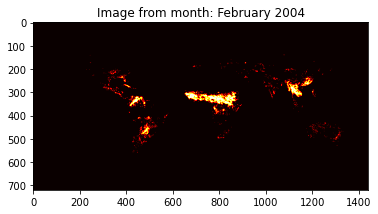

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
image = axes.imshow(data[0, 0], cmap='hot')
axes.set_title("Image from month: January 2003")

def update(frame):
    month = frame % 12
    year = 2003 + frame // 12
    image.set_array(data[year - 2003, month])
    axes.set_title(f"Image from month: {months[month]} {year}")
    return image,

ani_allyears = animation.FuncAnimation(fig, update, frames=data.shape[0], interval=1000, blit=True)

# Save the animation as a GIF file
animation_fp = base_path + "\\animation_duration_allyears.gif"
ani_allyears.save(animation_fp, writer='pillow')

print("Animation saved as animation_duration_allyears.gif")

### Examine Summary Statistics for All Years

In [14]:
# Statistical Summary
print("Statistical Summary:")
print("Mean:", np.mean(data))
print("Median:", np.median(data))
print("Standard Deviation:", np.std(data))
print("Minimum:", np.min(data))
print("Maximum:", np.max(data))
print()

Statistical Summary:
Mean: -9867.544
Median: -9999.0
Standard Deviation: 1140.8594
Minimum: -9999.0
Maximum: 130.0



### Conduct PCA

In [18]:
# Reshape the data to combine all images and bands
n_images = len(data)
n_bands = data[0].shape[0]
image_shape = data[0].shape[1:]
combined_data = np.concatenate([data[i].reshape(n_bands, -1) for i in range(n_images)], axis=1)

pca = PCA(n_components=2)
pca.fit(combined_data.T)

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Transform the data using the PCA model
transformed_data = pca.transform(combined_data.T)
inverse_transformed_data = pca.inverse_transform(transformed_data)
reshaped_transformed_data = np.transpose(inverse_transformed_data).reshape(n_images, n_bands, *image_shape)

In [19]:
explained_variance_ratio

array([0.35989722, 0.18207009])

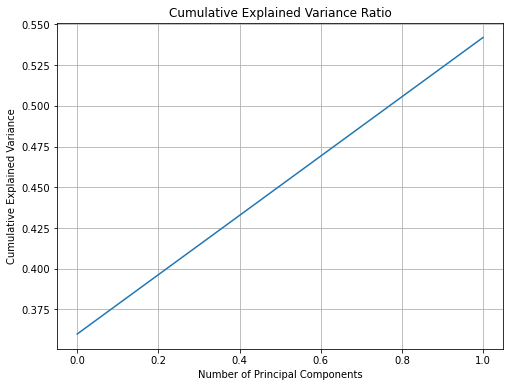

In [20]:
# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

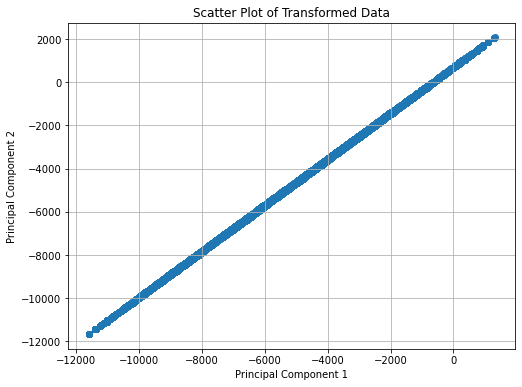

In [21]:
# Plot scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(inverse_transformed_data[:, 0], inverse_transformed_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Transformed Data')
plt.grid(True)
plt.show()

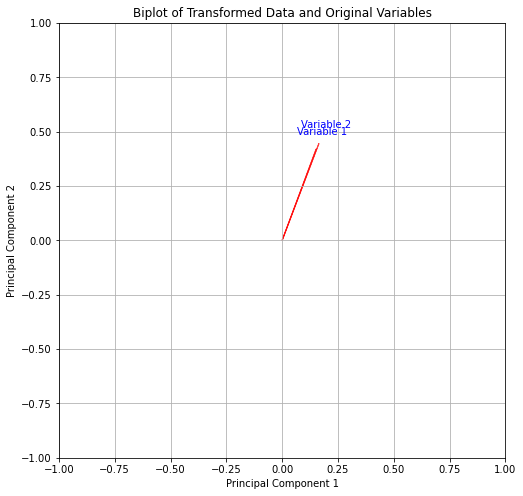

In [23]:
# Create a biplot of the first two principal components and original variables
plt.figure(figsize=(8, 8))
for i in range(len(pca.components_)):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.7)
    plt.text(pca.components_[0, i] * 1.2, pca.components_[1, i] * 1.2, f"Variable {i+1}", color='b', ha='center', va='center')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biplot of Transformed Data and Original Variables')
plt.grid(True)
plt.show()

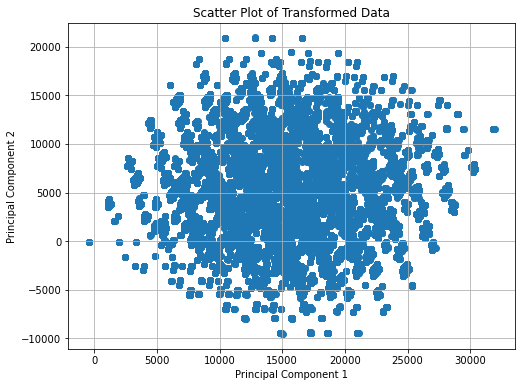

In [24]:
loadings = pca.components_[:2]
selected_transformed_data = transformed_data[:, :2]

kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(selected_transformed_data)

# Outlier Detection
outlier_indices = np.where(np.abs(transformed_data[:, 0]) > 0.4)

variable = np.random.randn(selected_transformed_data.shape[0])
corr, p_value = pearsonr(selected_transformed_data[:, 0], variable)

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Transformed Data')
plt.grid(True)
plt.show()

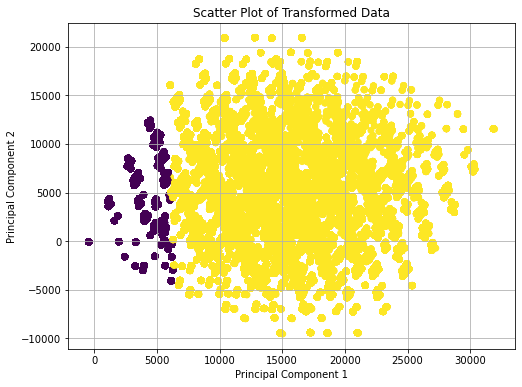

In [25]:
# Plotting the scatter plot with clusters
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=clusters)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Transformed Data')
plt.grid(True)
plt.show()